### IMPORTING LIBRARIES

In [60]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### IMPORTING DATA

In [198]:
data = pd.read_csv(r"C:\Users\Skill-Lync\Downloads\Amazon_Product Reviews_Dataset_Project 2.csv")

In [199]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


In [200]:
data.overall = data.overall.astype(int)

### CONVERTING OVERALL COLUMN (TO REVIEWS POSTIVE,NEGATIVE,NEUTRAL)

In [201]:
data.overall.replace(to_replace=[4,5,3,2,1],value=["positive","positive","neutral","negative","negative"],inplace=True)
data.rename({"overall":"sentiments"},axis=1,inplace=True)
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,sentiments,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,positive,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",positive,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,positive,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,positive,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",positive,best deal around,1373673600,2013-07-13,513,0,0


In [202]:
data.sentiments.value_counts()

positive    4449
negative     324
neutral      142
Name: sentiments, dtype: int64

### NULL VALUES

In [203]:
data.isnull().sum()

reviewerID        0
asin              0
reviewerName      1
helpful           0
reviewText        1
sentiments        0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
dtype: int64

In [204]:
data.reviewText.fillna("missing",inplace=True)
data.reviewerName.fillna("missing",inplace=True)

In [205]:
data.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
sentiments        0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
dtype: int64

### CONCATENATING REWIEWTEXT AND SUMMARY

In [206]:
data["reviews"] = data["reviewText"]+data["summary"]

In [207]:
data.drop(["reviewText","summary"],axis=1,inplace=True)

In [208]:
data.head()

,reviewerID,asin,reviewerName,helpful,sentiments,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,reviews
0,A3SBTW3WS4IQSN,B007WTAJTO,missing,"[0, 0]",positive,1406073600,2014-07-23,138,0,0,No issues.Four Stars
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",positive,1382659200,2013-10-25,409,0,0,"Purchased this for my device, it worked as adv..."
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",positive,1356220800,2012-12-23,715,0,0,it works as expected. I should have sprung for...
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",positive,1384992000,2013-11-21,382,0,0,This think has worked out great.Had a diff. br...
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",positive,1373673600,2013-07-13,513,0,0,"Bought it with Retail Packaging, arrived legit..."


### CREATING NEW DATA OF IMPORTANT COLUMNS

In [209]:
new_data = data[["reviews","sentiments"]]

In [210]:
new_data.head()

,reviews,sentiments
0,No issues.Four Stars,positive
1,"Purchased this for my device, it worked as adv...",positive
2,it works as expected. I should have sprung for...,positive
3,This think has worked out great.Had a diff. br...,positive
4,"Bought it with Retail Packaging, arrived legit...",positive


### TEXT CLASSIFICATION

In [211]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
lm = WordNetLemmatizer()
pt = PorterStemmer()
stop_word = set(stopwords.words('english'))

In [212]:
def remove_punct(text):
    text = text.lower()
    text = "".join([char for char in text if (char not in string.punctuation) and (char not in string.digits)])
    text = text.split()
    text2 = [lm.lemmatize(i) for i in text if i not in stop_word]
    final_text = " ".join(text2)
    return final_text

In [213]:
new_data["clean_text"]=new_data.reviews.apply(lambda x : remove_punct(x))

In [214]:
new_data.head()

,reviews,sentiments,clean_text
0,No issues.Four Stars,positive,issuesfour star
1,"Purchased this for my device, it worked as adv...",positive,purchased device worked advertised never much ...
2,it works as expected. I should have sprung for...,positive,work expected sprung higher capacity think mad...
3,This think has worked out great.Had a diff. br...,positive,think worked greathad diff bran gb card went s...
4,"Bought it with Retail Packaging, arrived legit...",positive,bought retail packaging arrived legit orange e...


### INPUT AND TARGET VARIABLE

In [215]:
x = new_data.clean_text
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(new_data.sentiments)


In [216]:
x.shape

(4915,)

In [217]:
y.shape

(4915,)

### CONVERTING TEXT TO VECTORS USING TF-IDF

In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tf = TfidfVectorizer(max_features=5000,ngram_range=((2,2)))
x = tf.fit_transform(x)

### BALANCING THE DATA

<AxesSubplot:ylabel='count'>

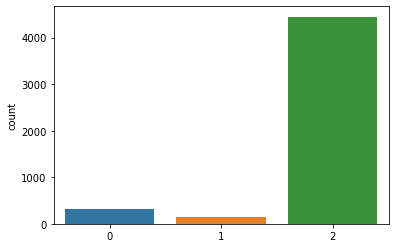

In [219]:
import seaborn as sns
sns.countplot(y)

In [220]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x,y)

###  IMPORTING SUPERVISED MODELS

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### TRAIN-TEST-SPLIT

In [222]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

### LOGISTIC REGRESSION

In [223]:
lr = LogisticRegression(multi_class="ovr")
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

### DECISION TREE

In [224]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

### NAIVE BAYES

In [225]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
nb_pred = nb.predict(x_test)

### KNEAREST

In [226]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

### COMAPARING ALL THE MODELS

In [227]:
print("logistic accuracy : ",accuracy_score(lr_pred,y_test))
print("decision accuracy : ",accuracy_score(dt_pred,y_test))
print("naive ba accuracy : ",accuracy_score(nb_pred,y_test))
print("knearest accuracy : ",accuracy_score(knn_pred,y_test))

logistic accuracy :  0.9388672460293677
decision accuracy :  0.9451603236439916
naive ba accuracy :  0.9328738387773449
knearest accuracy :  0.6634701827989212


* SO DECISION TREE IS PERFORMING WELL

### CONFUSION MATRIX OF DECISION TREE

Text(69.0, 0.5, 'Actual')

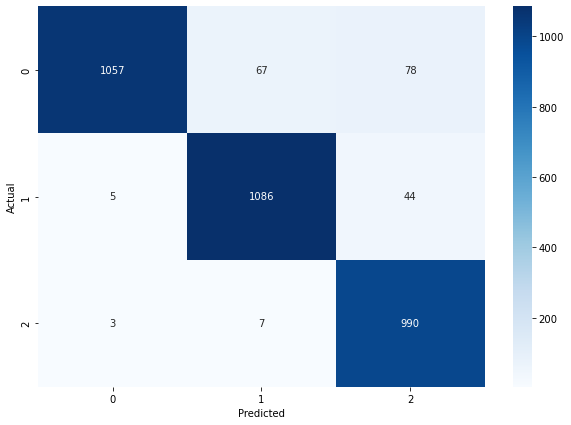

In [235]:
cm=confusion_matrix(lr_pred,y_test)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')


### PREDICTION USING DECISION TREE

In [234]:
msg = input("Enter Message: ") # to get the input message
msgInput = tf.transform([msg]) # 
predict = dt.predict(msgInput)
if(predict[0]==0):
    print("neutral_review")
elif(predict[0]==1):
    print("negative review")
elif(predict[0]==2):
    print("positve review")

Enter Message: No issues.Four Stars
positve review


### CHECKING MODEL IS OVERFITTED

In [183]:
dt_train_pred = dt.predict(x_train)


In [184]:
print("training accuracy : ",accuracy_score(dt_train_pred,y_train))
print("testing  accuracy : ",accuracy_score(dt_pred,y_test))

training accuracy :  0.9976023976023976
testing  accuracy :  0.9499550494456098


* It can be seen that there is no much difference between training and testing accuracy .
* We can say that model is neither overfitted nor underfitted.
* Hence we create an optimized model.